In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Mount Google Drive
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset from Google Drive
data = pd.read_csv('/content/drive/MyDrive/card_transdata.csv')

print(data.head())

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  


In [ ]:
# Data Exploration
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB
None
       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784     

In [ ]:
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Get the counts of fraud and non-fraud transactions
fraud_counts = data['fraud'].value_counts()

# Print the results
print(f"Non-Fraudulent Transactions: {fraud_counts[0]}")
print(f"Fraudulent Transactions: {fraud_counts[1]}")

Non-Fraudulent Transactions: 912597
Fraudulent Transactions: 87403


In [ ]:
def transaction_proximity(data):
  data['transaction_proximity'] = data['distance_from_home'] + data['distance_from_last_transaction']
  return data

data = transaction_proximity(data)

def purchase_ratio_scaled(data):
  data['purchase_ratio_scaled'] = data['ratio_to_median_purchase_price'] / data['ratio_to_median_purchase_price'].median()
  return data

data = purchase_ratio_scaled(data)


def fraud_probability(data):
    # Score based on binary transaction behavior indicators
    data['fraud_probability'] = (
        0.4 * data['repeat_retailer'] +
        0.2 * data['used_chip'] +
        0.2 * data['online_order'] +
        0.2 * data['used_pin_number']
    )
    return data

data = fraud_probability(data)



In [ ]:
data.info()
print(data.describe())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
 8   transaction_proximity           1000000 non-null  float64
 9   purchase_ratio_scaled           1000000 non-null  float64
 10  fraud_probability               1000000 non-null  float64
dtypes: float64(11)
memory usage: 83.9 MB
       distance_from_home  

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,transaction_proximity,purchase_ratio_scaled,fraud_probability
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,58.188997,1.950393,0.6
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,11.005534,1.297180,0.4
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,5.896232,0.428693,0.6
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,7.847608,0.363492,0.8
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,44.757422,2.227854,0.8
...,...,...,...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0,2.319752,1.630520,0.6
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0,22.556629,2.784660,0.6
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0,4.387544,0.218575,0.8
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0,4.500753,0.476911,0.6


In [ ]:
def fraud_score(id, transaction_proximity, purchase_ratio_scaled, fraud_probability, used_chip):
    score = 0
    #risk_links = []

  # Score based on the statistical distribution
    if transaction_proximity > 32:  # 75th percentile
        score += 30
    elif transaction_proximity > 14:  # Median
        score += 20
    else:
        score += 10

    # Purchase ratio score based on its distribution
    if purchase_ratio_scaled > 2:  # Above 75th percentile
        score += 40
    elif purchase_ratio_scaled > 1:  # Median
        score += 25
    else:
        score += 10

    # Fraud probability score based on its distribution
    if fraud_probability > 0.75:  # Above 75th percentile
        score += 40
    elif fraud_probability > 0.6:  # Median
        score += 25
    else:
        score += 10

    # Chip usage reduces fraud risk
    if used_chip == 1:
        score += 5  # Lower contribution since using a chip lowers risk
    else:
        score += 25  # Higher risk for non-chip transactions


    return score


for i in range(min(10000, len(data))):
    result = fraud_score(i, data['transaction_proximity'][i], data['purchase_ratio_scaled'][i], data['fraud_probability'][i], data['used_chip'][i])
    print(f"Transaction {i}: Score - {result}")

Streaming output truncated to the last 5000 lines.
Transaction 5000: Score - 90
Transaction 5001: Score - 80
Transaction 5002: Score - 70
Transaction 5003: Score - 50
Transaction 5004: Score - 85
Transaction 5005: Score - 75
Transaction 5006: Score - 70
Transaction 5007: Score - 85
Transaction 5008: Score - 55
Transaction 5009: Score - 65
Transaction 5010: Score - 85
Transaction 5011: Score - 80
Transaction 5012: Score - 90
Transaction 5013: Score - 90
Transaction 5014: Score - 100
Transaction 5015: Score - 65
Transaction 5016: Score - 85
Transaction 5017: Score - 65
Transaction 5018: Score - 70
Transaction 5019: Score - 50
Transaction 5020: Score - 65
Transaction 5021: Score - 75
Transaction 5022: Score - 70
Transaction 5023: Score - 85
Transaction 5024: Score - 70
Transaction 5025: Score - 90
Transaction 5026: Score - 105
Transaction 5027: Score - 75
Transaction 5028: Score - 95
Transaction 5029: Score - 50
Transaction 5030: Score - 85
Transaction 5031: Score - 100
Transaction 5032: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

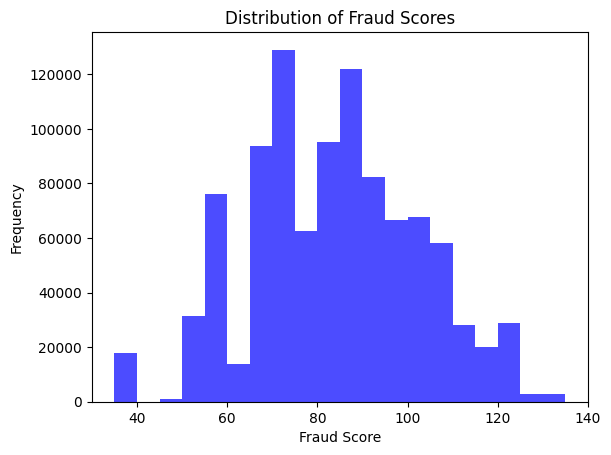

In [ ]:
import matplotlib.pyplot as plt

# Calculate fraud scores for all transactions
scores = [fraud_score(i, data['transaction_proximity'][i], data['purchase_ratio_scaled'][i], data['fraud_probability'][i], data['used_chip'][i]) for i in range(len(data))]

plt.hist(scores, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Fraud Scores')
plt.xlabel('Fraud Score')
plt.ylabel('Frequency')
plt.savefig("Distribution of Fraud Scores.png", bbox_inches='tight')
files.download("Distribution of Fraud Scores.png")
plt.show()



In [ ]:

scores_series = pd.Series(scores)

# Get descriptive statistics
print(scores_series.describe())

percentiles = scores_series.describe()
# Thresholds based on percentiles
rejection_threshold = percentiles['25%']
approval_threshold = percentiles['75%']

print(f"Rejection threshold: {rejection_threshold}")
print(f"Approval threshold: {approval_threshold}")

count    1000000.000000
mean          81.252835
std           18.776473
min           35.000000
25%           70.000000
50%           80.000000
75%           95.000000
max          135.000000
dtype: float64
Rejection threshold: 70.0
Approval threshold: 95.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

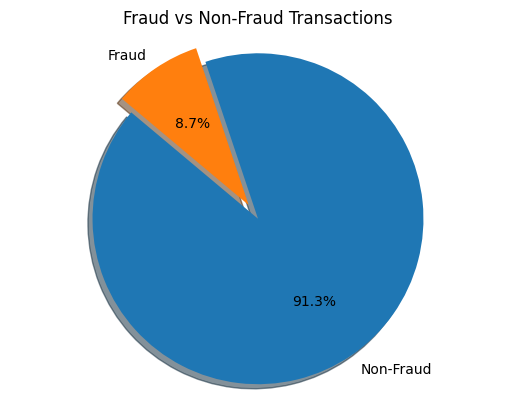

In [ ]:
# Count fraud vs non-fraud transactions
fraud_counts = data['fraud'].value_counts()

labels = ['Non-Fraud', 'Fraud']
sizes = [fraud_counts[0], fraud_counts[1]]
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Fraud vs Non-Fraud Transactions')
plt.axis('equal')
plt.savefig("Fraud vs Non-Fraud Transactions", bbox_inches='tight')
files.download("Fraud vs Non-Fraud Transactions.png")
plt.show()

In [ ]:
def calculateApprovalCountPerMetric(data):
    approvalCount = []
    rejectionCount = []

    a_proximity, a_purchase_ratio, a_fraud_prob, a_chip_used, a_fraud = 0, 0, 0, 0, 0
    r_proximity, r_purchase_ratio, r_fraud_prob, r_chip_used, r_fraud = 0, 0, 0, 0, 0

# Loop through the first 10,000 transactions
    for i in range((len(data))):
        score = fraud_score(i, data['transaction_proximity'][i], data['purchase_ratio_scaled'][i], data['fraud_probability'][i], data['used_chip'][i])

        # Track approvals and rejections based on score
        if score >= approval_threshold:
            a_proximity += 1  # Count as approved for proximity
        if score <= rejection_threshold:  # Corrected condition for rejection
            r_proximity += 1  # Count as rejected for proximity

        # Similar checks for other metrics with corrected rejection conditions
        if score >= approval_threshold:
            a_purchase_ratio += 1
        if score <= rejection_threshold:
            r_purchase_ratio += 1

        if score >= approval_threshold:
            a_fraud_prob += 1
        if score <= rejection_threshold:
            r_fraud_prob += 1

        if score >= approval_threshold:
            a_chip_used += 1
        if score <= rejection_threshold:
            r_chip_used += 1

            # Check if the transaction is fraudulent
        if data['fraud'][i] == 1:
            a_fraud += 1
        else:
            r_fraud += 1

    rejectionCount = [r_proximity, r_purchase_ratio, r_fraud_prob, r_chip_used]
    approvalCount = [a_proximity, a_purchase_ratio, a_fraud_prob, a_chip_used]

    # Print approval and rejection rates for each metric
    print(f"Rejection rate for Proximity: {r_proximity}")
    print(f"Rejection rate for Purchase Ratio: {r_purchase_ratio}")
    print(f"Rejection rate for Fraud Probability: {r_fraud_prob}")
    print(f"Rejection rate for Chip Used: {r_chip_used}")
    print(f"Fraudulent transactions: {r_fraud}")

    print(f"Approval rate for Proximity: {a_proximity}")
    print(f"Approval rate for Purchase Ratio: {a_purchase_ratio}")
    print(f"Approval rate for Fraud Probability: {a_fraud_prob}")
    print(f"Approval rate for Chip Used: {a_chip_used}")
    print(f"Non-fraudulent transactions: {a_fraud}")

    return rejectionCount, approvalCount

Rejection rate for Proximity: 362888
Rejection rate for Purchase Ratio: 362888
Rejection rate for Fraud Probability: 362888
Rejection rate for Chip Used: 362888
Fraudulent transactions: 912597
Approval rate for Proximity: 275180
Approval rate for Purchase Ratio: 275180
Approval rate for Fraud Probability: 275180
Approval rate for Chip Used: 275180
Non-fraudulent transactions: 87403


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

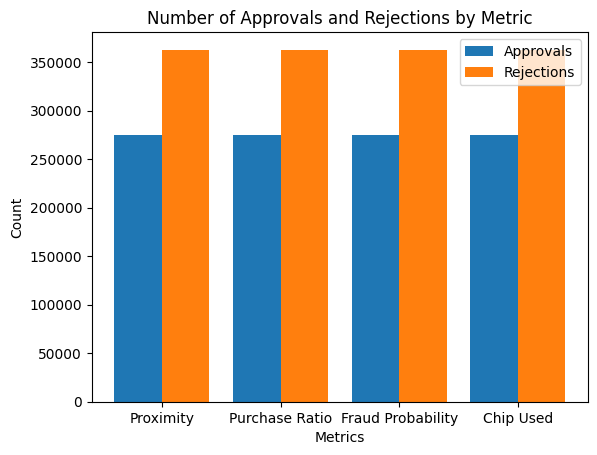

In [ ]:
rejectionCount, approvalCount = calculateApprovalCountPerMetric(data)

metrics = ['Proximity', 'Purchase Ratio', 'Fraud Probability', 'Chip Used']

# Create bar chart for visualizing approvals vs rejections
X = np.arange(len(metrics))

Yapprovals = np.array(approvalCount)
Zrejections = np.array(rejectionCount)

# Plot the data
plt.bar(X - 0.2, Yapprovals, 0.4, label='Approvals')
plt.bar(X + 0.2, Zrejections, 0.4, label='Rejections')
plt.xticks(X, metrics)
plt.xlabel("Metrics")
plt.ylabel("Count")
plt.title("Number of Approvals and Rejections by Metric")
plt.legend()
plt.savefig("Number of Approvals and Rejections by Metric.png", bbox_inches='tight')
files.download("Number of Approvals and Rejections by Metric.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

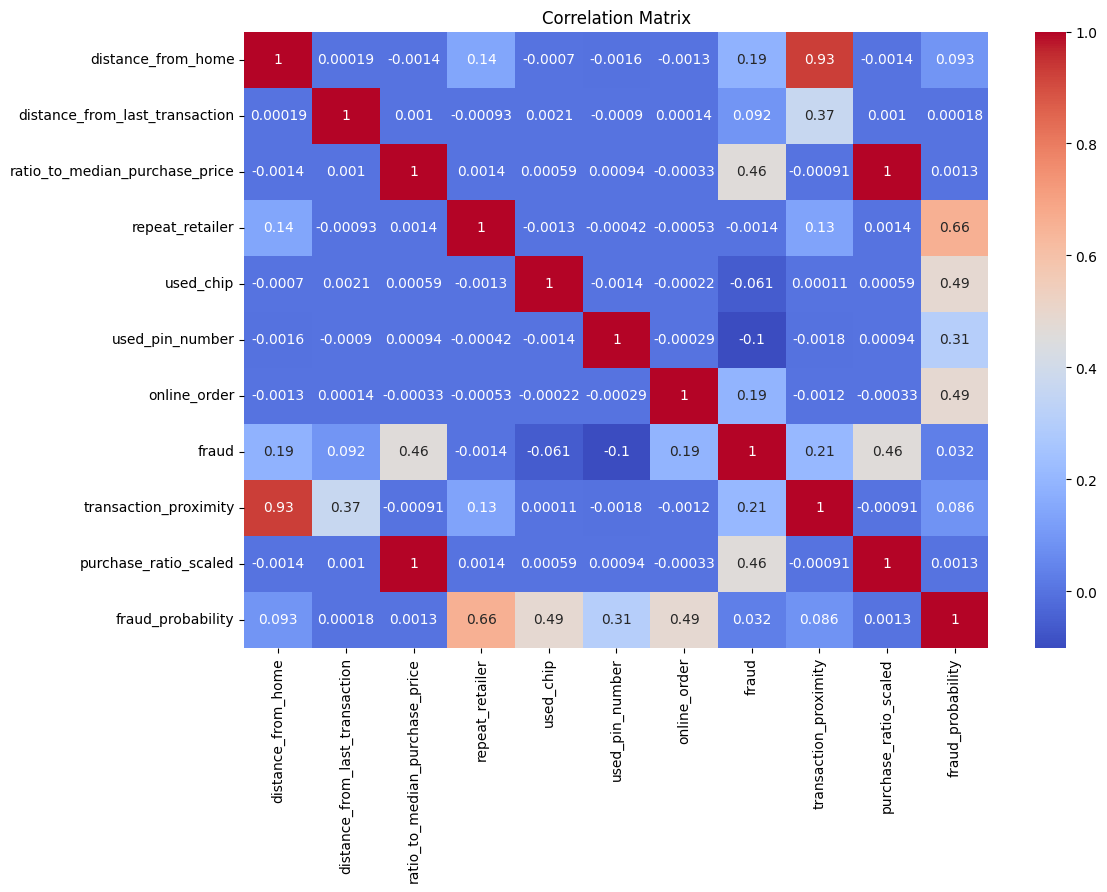

In [ ]:
# Correlation matrix
correlation_matrix = data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig("Correlation Matrix.png", bbox_inches='tight')
files.download("Correlation Matrix.png")
plt.show()


In [ ]:
not_fraud = data[data['fraud'] == 0]
fraud = data[data['fraud'] == 1]

In [ ]:
fraud.shape, not_fraud.shape

((87403, 11), (912597, 11))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

X = data.drop('fraud', axis=1)
y = data['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X.train = StandardScaler().fit_transform(X_train)
X.test = StandardScaler().fit_transform(X_test)

classification_model = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

<ipython-input-175-48553c408aac>:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.train = StandardScaler().fit_transform(X_train)
<ipython-input-175-48553c408aac>:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.test = StandardScaler().fit_transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9586030303030303
Decision Tree Accuracy: 0.9999575757575757
Random Forest Accuracy: 0.9999818181818182
K-Nearest Neighbors Accuracy: 0.977830303030303


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

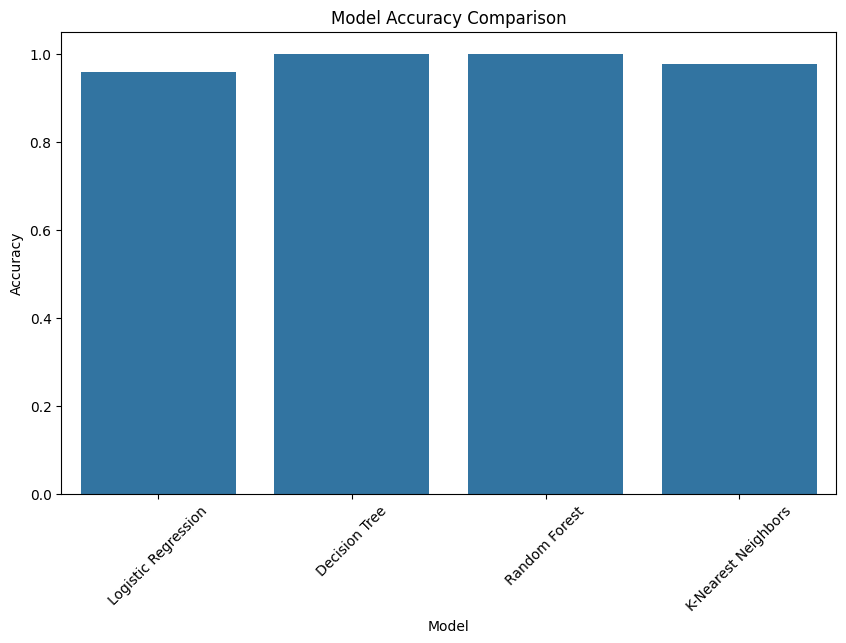

In [ ]:
model_names = []
model_scores = []

for name, model in classification_model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)

    model_names.append(name)
    model_scores.append(accuracy)
    print(f"{name} Accuracy: {accuracy}")

models = pd.DataFrame({
    'Model': model_names,
    'Accuracy': model_scores
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=models)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.savefig("Model Accuracy Comparison.png", bbox_inches='tight')
files.download("Model Accuracy Comparison.png")
plt.show()